#Install Deep Face Library#

In [1]:
!pip install deepface

     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 87 kB 7.4 MB/s 
     |████████████████████████████████| 2.3 MB 21.1 MB/s 
     |████████████████████████████████| 60.5 MB 1.2 MB/s 
     |████████████████████████████████| 462 kB 64.2 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=40b12acf2284f0f74a01d60fd168eb0b25a3dd1488491235baf9117ca4f7c1a4
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have im

##Import Deep Face Library, Open CV (digunakan untuk bounding wajah) dan matplotlib (untuk menampilkan gambar)##

In [3]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


Menampilkan seluruh dataset Anggota kelas yang diambil dari folder google drive

In [2]:
import os
folder1 = "https://github.com/namura/DeepFaceLibrary_AdvanceML/tree/main/Anggota%20Kelas"
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            channels = img.shape[-1] if img.ndim == 3 else 1
            if channels==1 :
              rgb_image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) * 255
              images.append(rgb_image)
            else:
              images.append(img)
    return images
x=load_images_from_folder(folder1)

FileNotFoundError: ignored

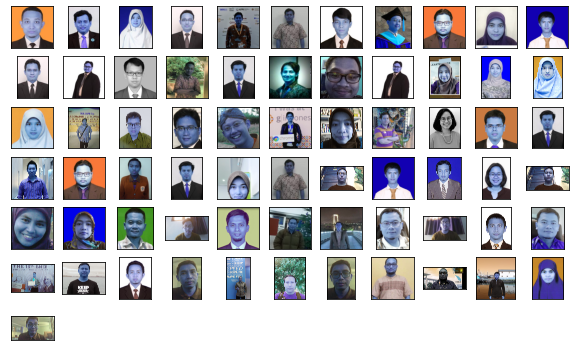

In [ ]:
plt.figure(figsize=(10,10))
for i in range(67):
    plt.subplot(11,11,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])
plt.show()

**Data terdiri dari dile RGB dan Grayscale dengan ekstesnsi jpg, jpeg dan jfif, perlu dilakukan pra proses data untuk menyamakan format data dan dimensi data**

In [ ]:
#importing the images
img1_path = '/content/drive/MyDrive/DatasetDeepFacelib/Anggota_Kelas/Mina Ismu Rahayu(1).jpg'
img2_path = '/content/drive/MyDrive/DatasetDeepFacelib/Anggota_Kelas/Mina Ismu Rahayu.jpg'
#img3_path = '/content/Img3.jpg'
#confirming the path of images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

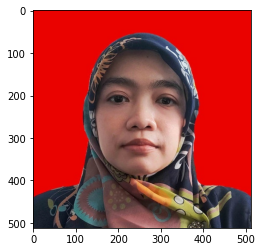

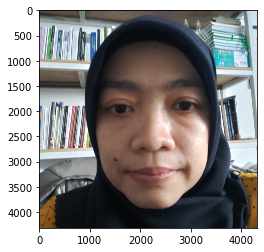

In [ ]:
plt.imshow(img1[:, :, ::-1 ]) #setting value as -1 to maintain saturation
plt.show()
plt.imshow(img2[:, :, ::-1 ]) 
plt.show()

In [ ]:
#calling VGGFace
model_name = "VGG-Face"
model = DeepFace.build_model(model_name)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:04<00:00, 143MB/s]


In [ ]:
#calling Facenet
model_name = "Facenet"
model = DeepFace.build_model(model_name)

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:02<00:00, 39.4MB/s]


In [ ]:
result = DeepFace.verify(img1_path,img2_path)#validate our images
DeepFace.verify(img1,img2)#generating result of comparison

{'detector_backend': 'opencv',
 'distance': 0.33562085132469044,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'threshold': 0.4,
 'verified': True}

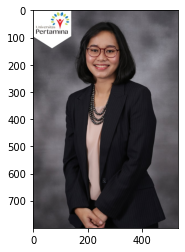

In [ ]:
img4_path = '/content/meredita.jpg' #setting path for different image
img4 = cv2.imread(img4_path)
#plotting the image
plt.imshow(img4[:, :, ::-1 ]) 
plt.show() 

In [ ]:
#comparing the faces in images using VGG Face
DeepFace.verify("/content/mn1.jpg","/content/meredita.jpg") 

{'detector_backend': 'opencv',
 'distance': 0.4085717286852326,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'threshold': 0.4,
 'verified': False}

In [ ]:
def impro(img):
  channels = img.ndim
  if channels==3 :
    rgb_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return rgb_image
  else:
    return img

In [ ]:
from PIL import Image
import cv2
import glob
import os
import sys
from pathlib import Path
path = "/content/drive/MyDrive/DatasetDeepFacelib/Anggota_Kelas/*.jpg"
for file in glob.glob(path):
  img = Image.open(file)
  npath=Path(file).stem
  file_name = os.path.basename(file)
  img.save('/content/drive/MyDrive/DatasetDeepFacelib/converted/'+npath+'.jpg')
  print(file_name + " preprocessed and saved")

handoko supeno.jpg preprocessed and saved
handoko-supeno.jpg preprocessed and saved
leni-fitriani.jpg preprocessed and saved
dewi-tresnawati.jpg preprocessed and saved
meza silvana.jpg preprocessed and saved
Meza-Silvana.jpg preprocessed and saved
arief sartono 2.jpg preprocessed and saved
Reza Budiawan(1).jpg preprocessed and saved
Arief Sartono.jpg preprocessed and saved
Baud-Prananto.jpg preprocessed and saved
AhmadLukyRamdani(1).jpg preprocessed and saved
Mina Ismu Rahayu.jpg preprocessed and saved
Imam-Ekowicaksono.jpg preprocessed and saved
meredita susanty(1).jpg preprocessed and saved
Reza-Budiawan.jpg preprocessed and saved
hartanto-tantriawan.jpg preprocessed and saved
Kemas Muhammad Irsan Riza.jpg preprocessed and saved
handoko-supeno-_2_.jpg preprocessed and saved
m khaerul naim.jpg preprocessed and saved
hartanto-tantriawan (1).jpg preprocessed and saved
Dewi-Tresnawati (1).jpg preprocessed and saved
imam-ekowicaksono_1_.jpg preprocessed and saved
adiyasa-nurfalah-3.jpg pr

In [ ]:
import cv2
import glob
import os
path = "/content/drive/MyDrive/DatasetDeepFacelib/converted/*.jpg"
for file in glob.glob(path):
  img = cv2.imread(file)
  file_name = os.path.basename(file)
  img_preprocessed = impro(img)
  # Save the img_preprocessed as a picture with a path matching 'file'
  cv2.imwrite('/content/drive/MyDrive/DatasetDeepFacelib/Anggota_kelas_baru/'+file_name, img_preprocessed)
  print(file_name + " preprocessed and saved")

handoko supeno.jpg preprocessed and saved
handoko-supeno.jpg preprocessed and saved
leni-fitriani.jpg preprocessed and saved
dewi-tresnawati.jpg preprocessed and saved
meza silvana.jpg preprocessed and saved
Meza-Silvana.jpg preprocessed and saved
arief sartono 2.jpg preprocessed and saved
Reza Budiawan(1).jpg preprocessed and saved
Arief Sartono.jpg preprocessed and saved
Baud-Prananto.jpg preprocessed and saved
AhmadLukyRamdani(1).jpg preprocessed and saved
Mina Ismu Rahayu.jpg preprocessed and saved
Imam-Ekowicaksono.jpg preprocessed and saved
meredita susanty(1).jpg preprocessed and saved
Reza-Budiawan.jpg preprocessed and saved
hartanto-tantriawan.jpg preprocessed and saved
Kemas Muhammad Irsan Riza.jpg preprocessed and saved
handoko-supeno-_2_.jpg preprocessed and saved
m khaerul naim.jpg preprocessed and saved
hartanto-tantriawan (1).jpg preprocessed and saved
Dewi-Tresnawati (1).jpg preprocessed and saved
imam-ekowicaksono_1_.jpg preprocessed and saved
adiyasa-nurfalah-3.jpg pr

In [ ]:
imgtest="/content/drive/MyDrive/DatasetDeepFacelib/datatest/mn3.jpeg"
detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]
model = DeepFace.build_model("VGG-Face")
metrics = ["cosine", "euclidean", "euclidean_l2"]
#storing match and ranks by creating a dataframe
df = DeepFace.find(img_path = imgtest, db_path ='/content/drive/MyDrive/DatasetDeepFacelib/Anggota_Kelas',enforce_detection=False, distance_metric = metrics[1],detector_backend = detectors[4]) 
result=df[0:5]
result

There are  38  representations found in  representations_vgg_face.pkl
find function lasts  0.43506932258605957  seconds


,identity,VGG-Face_euclidean
0,/content/drive/MyDrive/DatasetDeepFacelib/Angg...,0.359715
1,/content/drive/MyDrive/DatasetDeepFacelib/Angg...,0.426308
2,/content/drive/MyDrive/DatasetDeepFacelib/Angg...,0.426678
3,/content/drive/MyDrive/DatasetDeepFacelib/Angg...,0.454811
4,/content/drive/MyDrive/DatasetDeepFacelib/Angg...,0.457432


In [ ]:
imgtest="/content/drive/MyDrive/DatasetDeepFacelib/datatest/dian2.jpg"
detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]
obj = DeepFace.analyze(img_path = imgtest, actions = ['age', 'gender', 'race', 'emotion'],detector_backend = detectors[3])
obj

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]


{'age': 30,
 'dominant_emotion': 'neutral',
 'dominant_race': 'asian',
 'emotion': {'angry': 0.2731243148446083,
  'disgust': 1.3301034584856097e-05,
  'fear': 0.17599244602024555,
  'happy': 0.7500553969293833,
  'neutral': 98.60271215438843,
  'sad': 0.19501536153256893,
  'surprise': 0.003089290839852765},
 'gender': 'Woman',
 'race': {'asian': 79.93257402569938,
  'black': 0.6425252950221652,
  'indian': 4.5579859832508545,
  'latino hispanic': 9.342947970980164,
  'middle eastern': 1.4343584734926789,
  'white': 4.08961262877138},
 'region': {'h': 155, 'w': 155, 'x': 98, 'y': 81}}